In [1]:
import ccxt
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab
from datetime import datetime
# import seaborn as sns
import pickle
print(ccxt.exchanges) # print a list of all available exchange classes

['_1broker', '_1btcxe', 'anxpro', 'binance', 'bit2c', 'bitbay', 'bitbays', 'bitcoincoid', 'bitfinex', 'bitflyer', 'bitlish', 'bitmarket', 'bitmex', 'bitso', 'bitstamp', 'bittrex', 'bl3p', 'btcchina', 'btce', 'btcexchange', 'btcmarkets', 'btctradeua', 'btcturk', 'btcx', 'bter', 'bxinth', 'ccex', 'cex', 'chbtc', 'chilebit', 'coincheck', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinsecure', 'coinspot', 'cryptopia', 'dsx', 'exmo', 'flowbtc', 'foxbit', 'fybse', 'fybsg', 'gatecoin', 'gdax', 'gemini', 'hitbtc', 'huobi', 'itbit', 'jubi', 'kraken', 'lakebtc', 'livecoin', 'liqui', 'luno', 'mercado', 'okcoincny', 'okcoinusd', 'okex', 'paymium', 'poloniex', 'quadrigacx', 'quoine', 'southxchange', 'surbitcoin', 'therock', 'urdubit', 'vaultoro', 'vbtc', 'virwox', 'xbtce', 'yobit', 'yunbi', 'zaif']


In [2]:
coincheck = ccxt.coincheck()
zaif = ccxt.zaif()
bitflyer = ccxt.bitflyer()
quoine = ccxt.quoine()

In [3]:
def create_df_trade(trade_dict, csv_name):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=["coincheck","id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv(csv_name+datetime.now().strftime('%Y-%m-%d')+".csv")

In [ ]:
i = 0
trade_dict={}
name = "coincheck"
while True:
    try:
        i += 1

        trades=coincheck.fetchTrades("BTC/JPY")
        for trade in trades:
            trade_dict[trade["id"]] = trade
        #     print(trade)
        #     trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    except:
        print('Failed to access API')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to access API')
    
    #     書き込み
    try:
        if i %1000 == 0:
            print(i)
            create_df_trade(trade_dict, name)
            with open(name+'_log.pickle', mode='wb') as f:
                pickle.dump(trade_dict, f)
            # TODO:trade_dictが重そうやったらtrade_dict,df_tradeを初期化する
    except:
        print('Failed to write')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to write')

1000


/home/take/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [35]:
with open('coincheck_log.pickle', mode='wb') as f:
    pickle.dump(trade_dict, f)

In [36]:
len(trade_dict)

5287

In [4]:
def create_df_trade(trade_dict):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=["coincheck","id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv("coincheck_0827.csv")

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [39]:
df_trade.head()

,coincheck,id,created_at,amount,order_type,rate
created_at,,,,,,
2017-08-26 06:21:30,coincheck,16480030,2017-08-26 06:21:30,0.0078,sell,472677
2017-08-26 06:21:30,coincheck,16480029,2017-08-26 06:21:30,0.0051,sell,472730
2017-08-26 06:21:35,coincheck,16480032,2017-08-26 06:21:35,0.0020,sell,472686
2017-08-26 06:21:35,coincheck,16480031,2017-08-26 06:21:35,0.0270,sell,472698
2017-08-26 06:21:38,coincheck,16480033,2017-08-26 06:21:38,0.0100,buy,472754


In [40]:
df_trade.to_csv("coincheck_0826_2.csv")

In [41]:
df_summary = df_trade_amount.groupby(pd.TimeGrouper(freq="min")).aggregate(np.sum)[1:]
df_summary.head()

,amount
created_at,
2017-08-26 06:22:00,0.880368
2017-08-26 06:23:00,2.464232
2017-08-26 06:24:00,11.270953
2017-08-26 06:25:00,10.314184
2017-08-26 06:26:00,14.630704


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

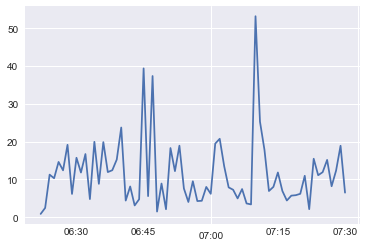

In [42]:
df_summary['amount'].plot()